# Parameter recovery of the hierarchical DDM with starting point bias

## Simulate group data

In [1]:
from rlssm.random.random_DDM import simulate_hier_ddm

data = simulate_hier_ddm(n_trials=200,
                         n_participants=10,
                         gen_mu_drift=.6, gen_sd_drift=.1,
                         gen_mu_threshold=.5, gen_sd_threshold=.1,
                         gen_mu_ndt=0, gen_sd_ndt=.01,
                         gen_mu_rel_sp=.1, gen_sd_rel_sp=.01)

In [2]:
data.head()

threshold       ndt     drift   rel_sp        rt  accuracy
participant trial                                                            
1           1       0.997566  0.687824  0.677658  0.54481  0.762824       1.0
            2       0.997566  0.687824  0.677658  0.54481  0.782824       0.0
            3       0.997566  0.687824  0.677658  0.54481  1.317824       1.0
            4       0.997566  0.687824  0.677658  0.54481  0.889824       1.0
            5       0.997566  0.687824  0.677658  0.54481  1.135824       1.0

In [3]:
data.groupby('participant').describe()[['rt', 'accuracy']]

rt                                                    \
             count      mean       std       min       25%       50%   
participant                                                            
1            200.0  0.928674  0.168041  0.711824  0.810324  0.890324   
2            200.0  0.937076  0.219904  0.709391  0.781391  0.874391   
3            200.0  0.960827  0.214239  0.719352  0.825102  0.898852   
4            200.0  0.921799  0.179152  0.710364  0.782114  0.865864   
5            200.0  0.894215  0.159333  0.709410  0.770410  0.832410   
6            200.0  0.890137  0.153577  0.718092  0.784842  0.844092   
7            200.0  1.037216  0.281163  0.726326  0.819326  0.943826   
8            200.0  0.941757  0.194178  0.709367  0.798367  0.888867   
9            200.0  0.948363  0.222625  0.717818  0.803068  0.892318   
10           200.0  0.939092  0.180142  0.722577  0.810577  0.867077   

                                accuracy                                       \
                  75%       max    count   mean       std  min  25%  50%  75%   
participant                                                                     
1            1.013324  1.583824    200.0  0.725  0.447635  0.0  0.0  1.0  1.0   
2            1.010391  2.144391    200.0  0.735  0.442441  0.0  0.0  1.0  1.0   
3            1.024602  2.190352    200.0  0.685  0.465682  0.0  0.0  1.0  1.0   
4            1.017864  1.528364    200.0  0.630  0.484016  0.0  0.0  1.0  1.0   
5            0.968910  1.417410    200.0  0.665  0.473175  0.0  0.0  1.0  1.0   
6            0.960342  1.636092    200.0  0.705  0.457187  0.0  0.0  1.0  1.0   
7            1.148826  2.261326    200.0  0.770  0.421889  0.0  1.0  1.0  1.0   
8            1.022867  1.876367    200.0  0.695  0.461563  0.0  0.0  1.0  1.0   
9            1.011818  2.127818    200.0  0.650  0.478167  0.0  0.0  1.0  1.0   
10           1.013827  1.564577    200.0  0.660  0.474898  0.0  0.0  1.0  1.0   

                  
             max  
participant       
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  
6            1.0  
7            1.0  
8            1.0  
9            1.0  
10           1.0

## Initialize the model

In [4]:
from rlssm.model.models_DDM import DDModel

model = DDModel(hierarchical_levels=2, starting_point_bias=True)

## Fit

In [5]:
# sampling parameters
n_warmup = 1000
n_sampling = 2000
n_chains = 2
n_thin = 1

In [6]:
model_fit = model.fit(
    data,
    thin=n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains=n_chains)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

### get Rhat

In [7]:
model_fit.rhat.describe()

rhat
count  14093.000000
mean       0.999916
std        0.000306
min        0.999508
25%        0.999701
50%        0.999828
75%        1.000100
max        1.002040

### calculate wAIC

In [8]:
model_fit.waic

{'lppd': -174.3369425876112,
 'p_waic': 18.97106088333264,
 'waic': 386.6160069418877,
 'waic_se': 90.60004515163243}

## Posteriors

In [9]:
model_fit.samples.describe()

threshold_sbj[1]  threshold_sbj[2]  threshold_sbj[3]  threshold_sbj[4]  \
count       4000.000000       4000.000000       4000.000000       4000.000000   
mean           1.022759          1.018713          1.071132          0.982048   
std            0.030045          0.030909          0.031569          0.029368   
min            0.919124          0.881666          0.954651          0.887830   
25%            1.002065          0.998551          1.048843          0.961496   
50%            1.023060          1.017810          1.071125          0.981486   
75%            1.042393          1.037983          1.092190          1.001213   
max            1.139410          1.139710          1.183850          1.104020   

       threshold_sbj[5]  threshold_sbj[6]  threshold_sbj[7]  threshold_sbj[8]  \
count       4000.000000       4000.000000       4000.000000       4000.000000   
mean           0.930144          0.935707          1.203107          1.034275   
std            0.027376          0.028984          0.036440          0.029803   
min            0.849033          0.840513          1.066060          0.933550   
25%            0.911299          0.916305          1.178795          1.014660   
50%            0.929302          0.935411          1.202840          1.034090   
75%            0.948337          0.954928          1.227215          1.053683   
max            1.044150          1.037650          1.346960          1.138380   

       threshold_sbj[9]  threshold_sbj[10]  ...   ndt_sbj[1]   ndt_sbj[2]  \
count       4000.000000        4000.000000  ...  4000.000000  4000.000000   
mean           1.036711           1.032244  ...     0.690977     0.688491   
std            0.028988           0.030481  ...     0.002660     0.003356   
min            0.926057           0.928768  ...     0.679488     0.666972   
25%            1.017308           1.012408  ...     0.689397     0.686666   
50%            1.036335           1.031730  ...     0.691080     0.689013   
75%            1.055883           1.052290  ...     0.692642     0.690846   
max            1.137600           1.152760  ...     0.700987     0.696966   

        ndt_sbj[3]   ndt_sbj[4]   ndt_sbj[5]   ndt_sbj[6]   ndt_sbj[7]  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.692492     0.689865     0.690251     0.692928     0.691174   
std       0.003266     0.002800     0.002678     0.003050     0.003311   
min       0.677319     0.672696     0.676422     0.681445     0.672121   
25%       0.690340     0.688298     0.688715     0.690874     0.689380   
50%       0.692206     0.690156     0.690510     0.692604     0.691183   
75%       0.694279     0.691798     0.692016     0.694870     0.693054   
max       0.707877     0.700162     0.698433     0.704206     0.706131   

        ndt_sbj[8]   ndt_sbj[9]  ndt_sbj[10]  
count  4000.000000  4000.000000  4000.000000  
mean      0.690522     0.691567     0.693453  
std       0.002780     0.002896     0.003498  
min       0.675451     0.679971     0.682390  
25%       0.688976     0.689820     0.690989  
50%       0.690743     0.691507     0.692941  
75%       0.692287     0.693357     0.695524  
max       0.699186     0.702947     0.707094  

[8 rows x 44 columns]

In [10]:
import seaborn as sns

sns.set(context="talk",
        style="white",
        palette="husl",
        rc={'figure.figsize': (15, 8)})

Here we plot the estimated posterior distributions against the generating parameters, to see whether the model parameters are recovering well:

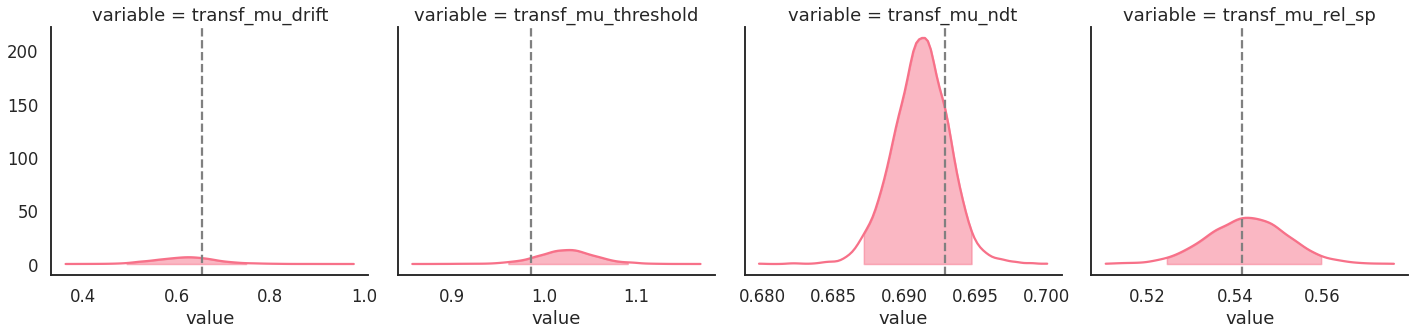

In [11]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

for i, ax in enumerate(g.axes.flatten()):
    ax.axvline(data[['drift', 'threshold', 'ndt', 'rel_sp']].mean().values[i], color='grey', linestyle='--')